# 라이브러리 로드

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

<AxesSubplot:title={'center':'한글'}>

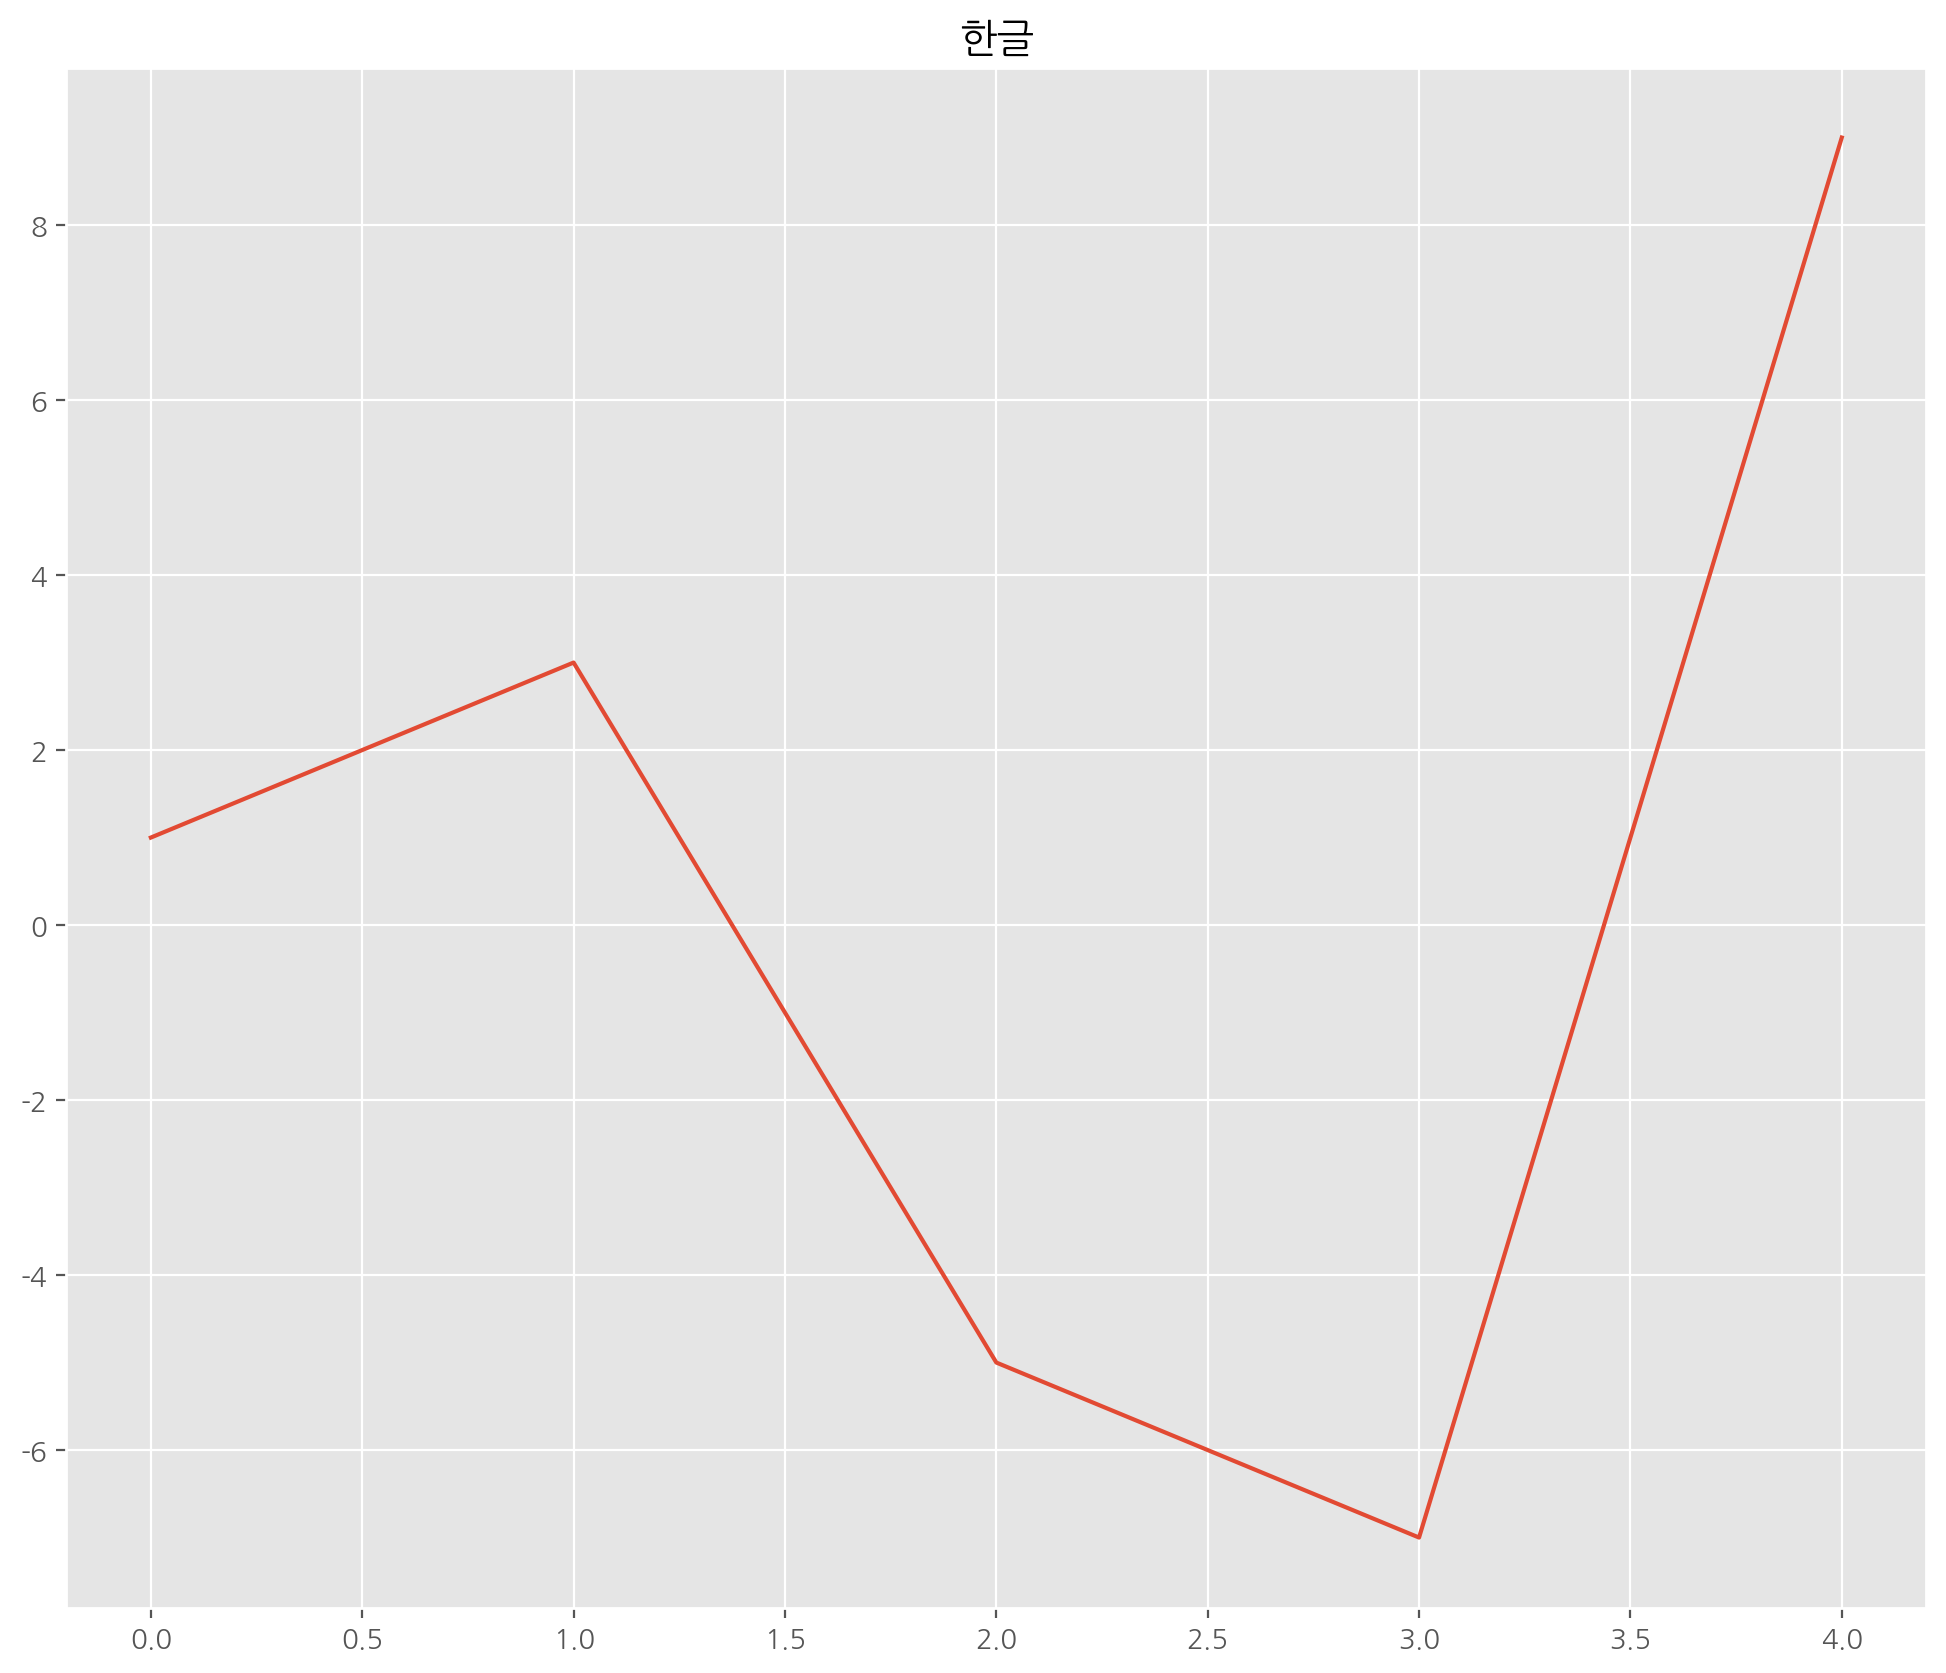

In [44]:
# 한글, 음수가 깨지지 않고 잘 출력되는지 확인
plt.style.use('ggplot')
pd.Series([1, 3, -5, -7, 9]).plot(title="한글", figsize=(12, 10))

# 데이터 불러오기

In [45]:
# 파일 경로 출력
from glob import glob

file_path = glob("apt*.csv")
file_path

['apt주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210930.csv',
 'apt전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv']

In [46]:
# 최근 데이터 파일 불러오기
df_last = pd.read_csv(file_path[0], encoding="cp949")
df_last.shape

(6120, 5)

In [47]:
# 과거 데이터 파일 불러오기
df_first = pd.read_csv(file_path[1], encoding="cp949")
df_first.shape

(17, 22)

## 두 데이터의 형식이 완전 다른 것을 알 수 있음

In [48]:
df_last.head(2)

,지역명,규모구분,연도,월,분양가격
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652


In [49]:
df_first.head(2)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


# 데이터를 합치기 위해 최신 데이터 전처리

## 결측지 조회

In [50]:
# 결측치 개수 조회
df_last.isnull().sum()

지역명       0
규모구분      0
연도        0
월         0
분양가격    479
dtype: int64

In [51]:
# 결측치 비율 조회
df_last.isnull().mean()

지역명     0.000000
규모구분    0.000000
연도      0.000000
월       0.000000
분양가격    0.078268
dtype: float64

<AxesSubplot:>

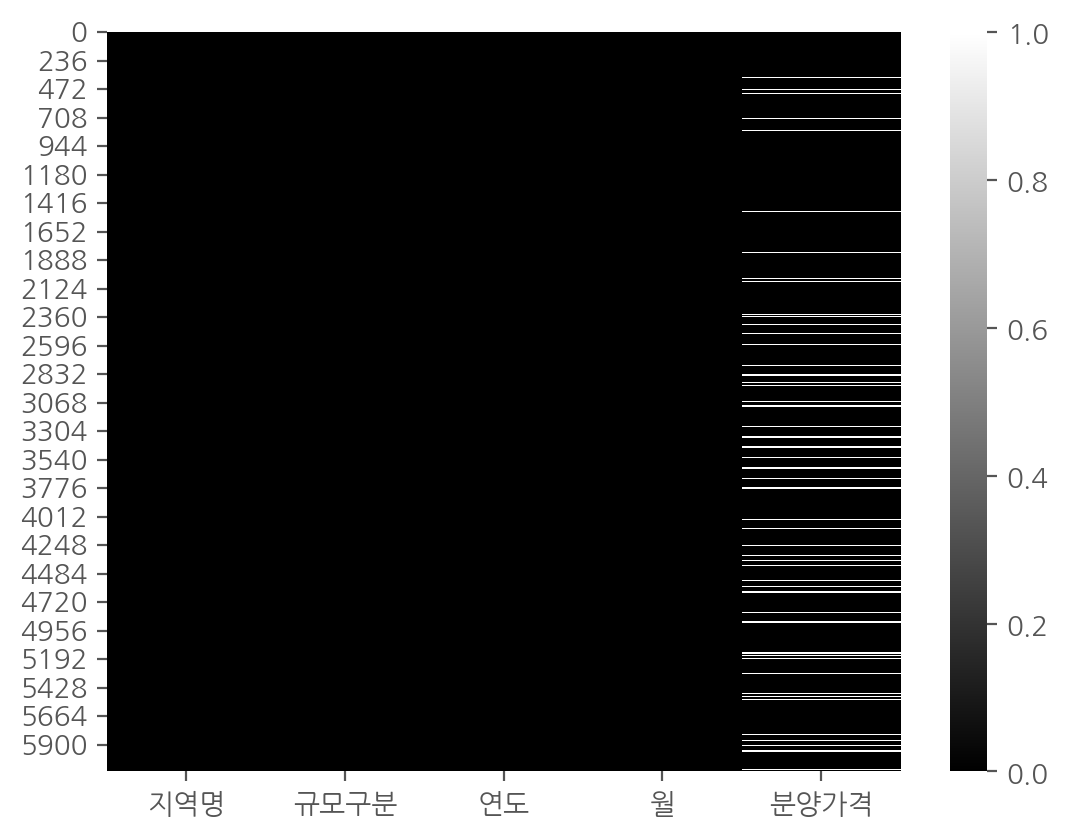

In [52]:
# 결측치 시각화
sns.heatmap(df_last.isnull(), cmap="gray")

## 데이터 타입 변경, 파생변수 생성
* `pd.to_numeric(df)`
* `errors='coerce'` : 결측치와 같은 에러가 났을 때 NaN으로 변경
* `df.astype(int)`은 결측치 처리에서 문제 발생

In [53]:
# 숫자를 제외한 모든 문자를 빈문자로 변경하는 정규표현
# df_last["분양가격"] = df_last["분양가격"].str.replace("[^0-9]", "", regex=True)

In [54]:
df_last["분양가격"] = pd.to_numeric(df_last["분양가격"], errors='coerce')

In [55]:
# 파생변수 : 평당분양가격
df_last["평당분양가격"] = df_last["분양가격"] * 3.3

In [56]:
df_last.head(3)

,지역명,규모구분,연도,월,분양가격,평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6


In [57]:
# Dtype이 잘 변경된 것을 볼 수 있음
df_last["평당분양가격"].describe()

count     5625.000000
mean     11415.748960
std       4658.860978
min       6164.400000
25%       8494.200000
50%      10121.100000
75%      12942.600000
max      45655.500000
Name: 평당분양가격, dtype: float64

## unique 값 출력 

In [58]:
df_last

,지역명,규모구분,연도,월,분양가격,평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7
...,...,...,...,...,...,...
6115,제주,모든면적,2021,9,8356.0,27574.8
6116,제주,전용면적 60제곱미터이하,2021,9,NaN,NaN
6117,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,9,8410.0,27753.0
6118,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,9,NaN,NaN


In [59]:
# regex=True : 결과는 같고 경고메시지 출력 여부만 달라진다. 현재는 기본값이 True지만 미래버전에서 False로 될 예정
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적|제곱미터이하", "", regex=True)
df_last["전용면적"] = df_last["전용면적"].str.replace("제곱미터초과", "~")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ", "")
df_last["전용면적"]

0         모든면적
1           60
2        60~85
3       85~102
4         102~
         ...  
6115      모든면적
6116        60
6117     60~85
6118    85~102
6119      102~
Name: 전용면적, Length: 6120, dtype: object

In [60]:
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적|제곱미터이하", "")

/var/folders/ql/gbsdt1191mbf_hk8mhnwwpd80000gn/T/ipykernel_42057/1323221951.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적|제곱미터이하", "")


## 필요없는 컬럼 제거

In [61]:
# 메모리 334kb 확인할 수 있음
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     6120 non-null   object 
 1   규모구분    6120 non-null   object 
 2   연도      6120 non-null   int64  
 3   월       6120 non-null   int64  
 4   분양가격    5625 non-null   float64
 5   평당분양가격  5625 non-null   float64
 6   전용면적    6120 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 334.8+ KB


In [62]:
# 삭제할 수 있는 두 가지 코드
# df_last = df_last.drop(labels=["규모구분", "분양가격"], axis=1)
df_last = df_last.drop(columns=["규모구분", "분양가격"])

In [63]:
df_last

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60
2,서울,2015,10,19410.6,60제곱미터초과 85
3,서울,2015,10,18879.3,85제곱미터초과 102
4,서울,2015,10,19400.7,102제곱미터초과
...,...,...,...,...,...
6115,제주,2021,9,27574.8,모든면적
6116,제주,2021,9,NaN,60
6117,제주,2021,9,27753.0,60제곱미터초과 85
6118,제주,2021,9,NaN,85제곱미터초과 102


In [65]:
# 메모리가 줄어든 것을 볼 수 있음
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     6120 non-null   object 
 1   연도      6120 non-null   int64  
 2   월       6120 non-null   int64  
 3   평당분양가격  5625 non-null   float64
 4   전용면적    6120 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 239.2+ KB


## 시각화 

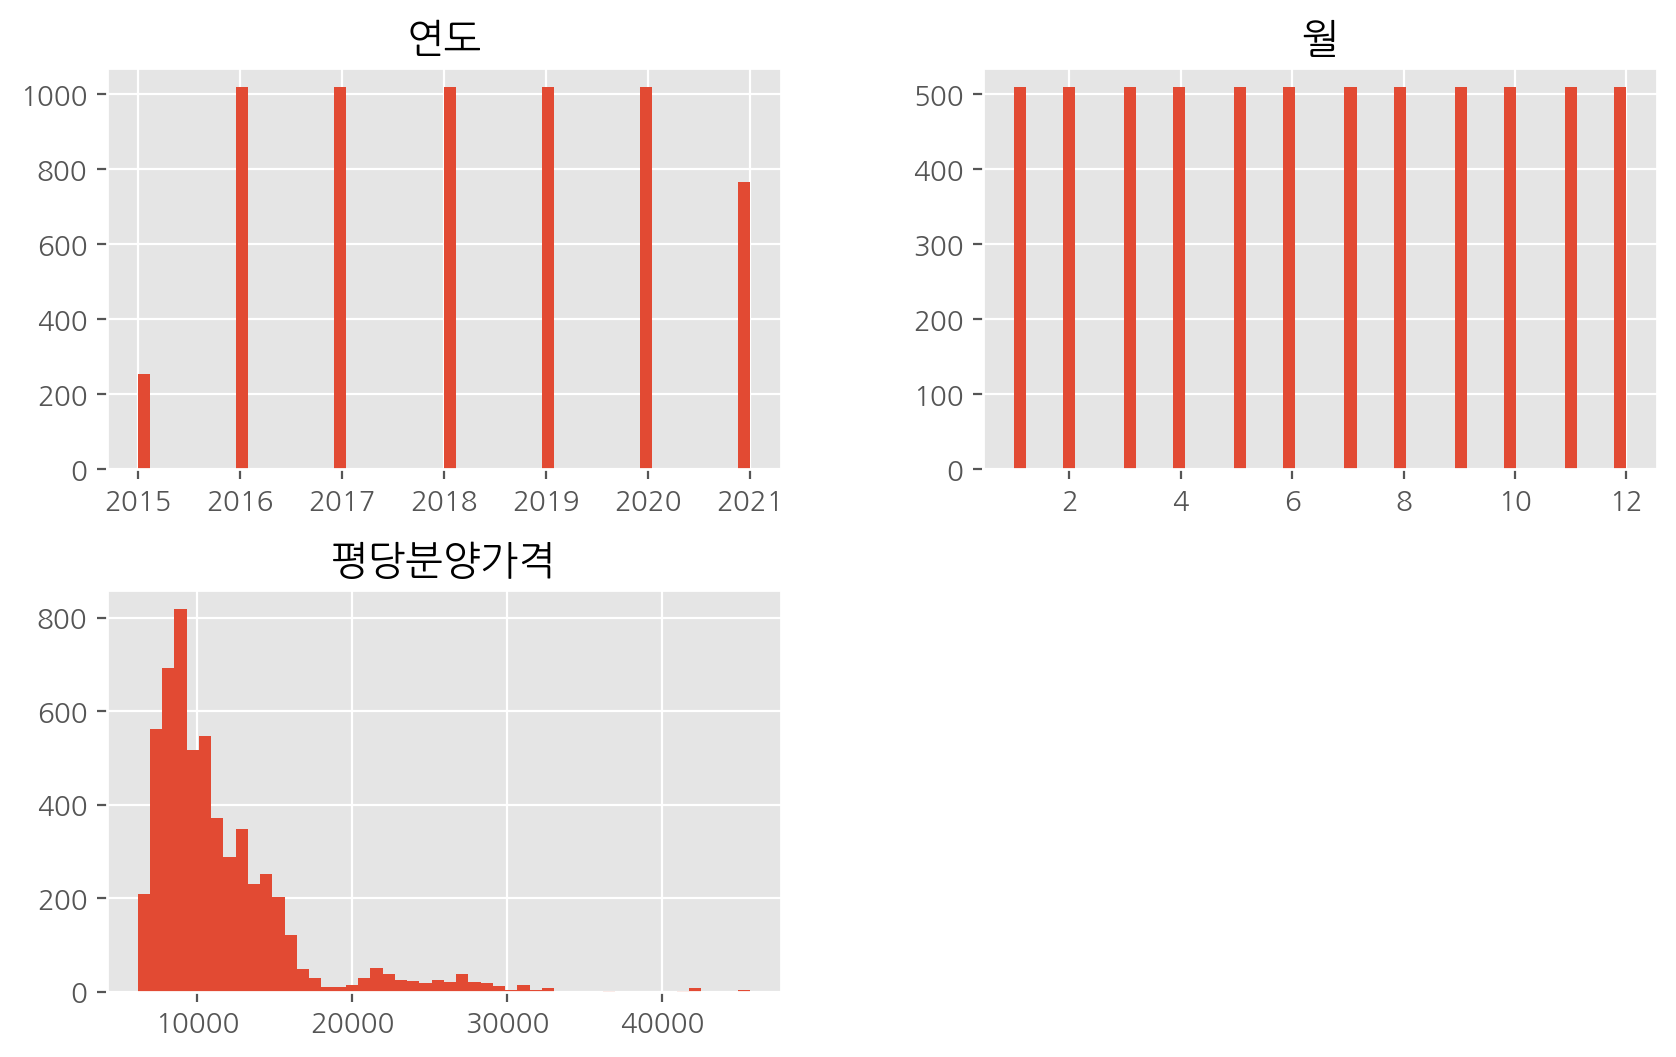

In [67]:
df_last.hist(figsize=(10, 6), bins=50);

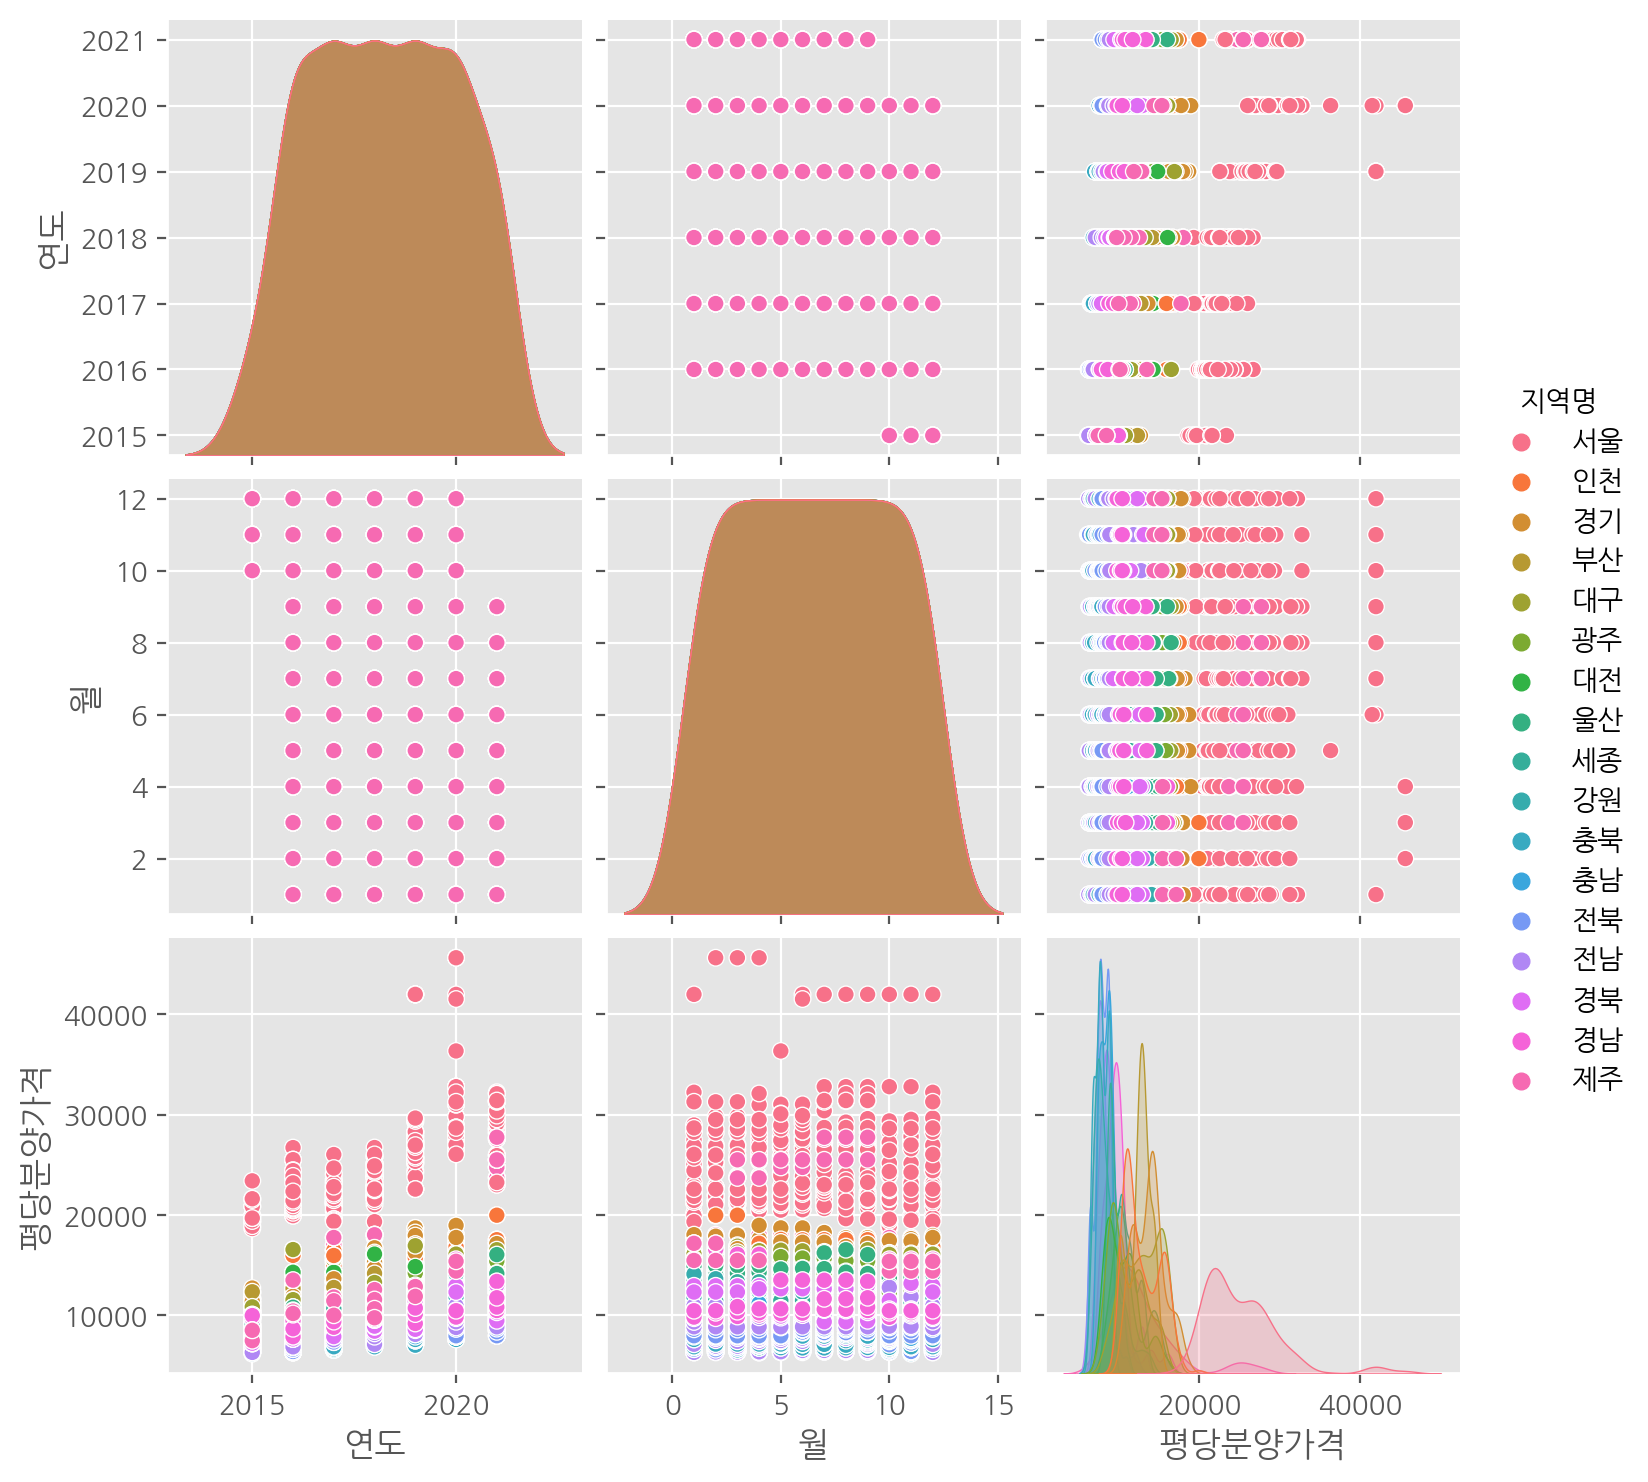

In [68]:
sns.pairplot(df_last, hue="지역명")

# 이전 데이터 전처리